<a href="https://colab.research.google.com/github/Jeff-Boii/image-processing/blob/main/Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
from google.colab.patches import cv2_imshow
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.color import rgb2gray
import matplotlib.image as mimg

In [ ]:
c0=os.listdir("/content/drive/MyDrive/Pablo Escobar-20230415T140519Z-001/Pablo Escobar")
c1=os.listdir("/content/drive/MyDrive/Osama Bin Laden-20230415T140517Z-001/Osama Bin Laden")

In [ ]:
limit=10
c0_images=[None]*limit
j=0
for i in c0:
 if(j<limit):
  c0_images[j]=imread("/content/drive/MyDrive/Pablo Escobar-20230415T140519Z-001/Pablo Escobar/"+i)
  j+=1
 else:
  break

In [ ]:
c1_images=[None]*limit
j=0
for i in c1:
 if(j<limit):
  c1_images[j]=imread("/content/drive/MyDrive/Osama Bin Laden-20230415T140517Z-001/Osama Bin Laden/"+i)
  j+=1
 else:
  break

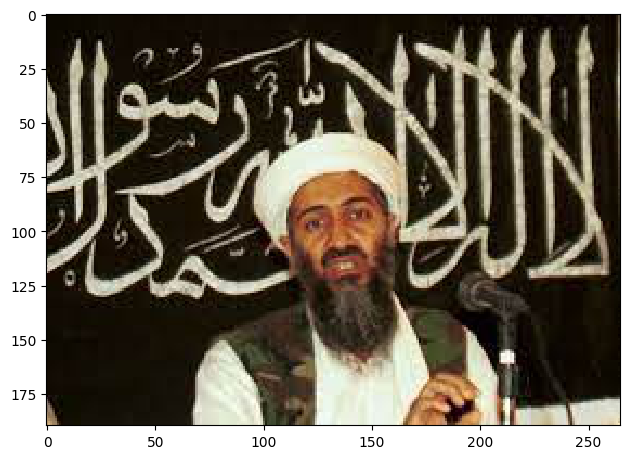

In [ ]:
imshow(c0_images[1])
imshow(c1_images[1])

In [ ]:
c0_gray=[None]*limit
j=0
for i in c0:
 if(j<limit):
  c0_gray[j]=rgb2gray(c0_images[j])
  j+=1
 else:
  break

In [ ]:
c1_gray=[None]*limit
j=0
for i in c1:
 if(j<limit):
  c1_gray[j]=rgb2gray(c1_images[j])
  j+=1
 else:
  break

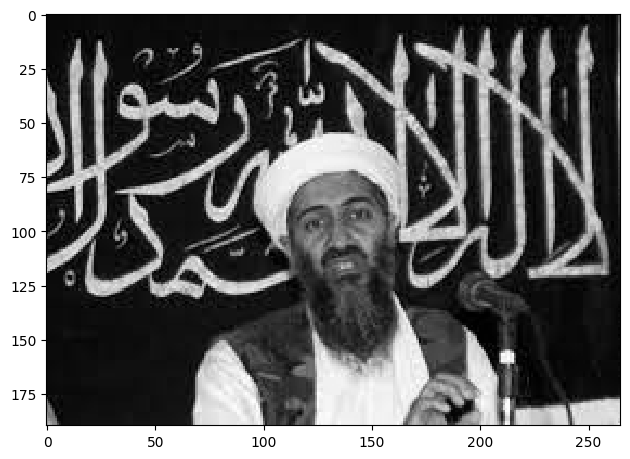

In [ ]:
imshow(c0_gray[1])
imshow(c1_gray[1])

In [ ]:
for j in range (10):
 _c0 = c0_gray[j]
 c0_gray[j]=resize(_c0,(240,240))

for j in range (10):
 _c1=c1_gray[j]
 c1_gray[j]=resize(_c1,(240,240))

In [ ]:
len_of_images_c0=len(c0_gray)
len_of_images_c1=len(c1_gray)

In [ ]:
image_size_c0=c0_gray[1].shape
image_size_c1=c1_gray[1].shape

In [ ]:
flatten_size_c0=image_size_c0[0]*image_size_c0[1]
flatten_size_c1=image_size_c1[0]*image_size_c1[1]

In [ ]:
for i in range(10):
 c0_gray[i]=np.ndarray.flatten(c0_gray[i]).reshape(flatten_size_c0,1)
for i in range(10):
 c1_gray[i]=np.ndarray.flatten(c1_gray[i]).reshape(flatten_size_c1,1)

In [ ]:
c0_gray=np.dstack(c0_gray)
c1_gray=np.dstack(c1_gray)

In [ ]:
c0_gray=np.rollaxis(c0_gray,axis=2,start=0)
c1_gray=np.rollaxis(c1_gray,axis=2,start=0)

In [ ]:
c0_gray=c0_gray.reshape(len_of_images_c0,flatten_size_c0)
c1_gray=c1_gray.reshape(len_of_images_c1,flatten_size_c1)

In [ ]:
c0_data=pd.DataFrame(c0_gray)
c1_data=pd.DataFrame(c1_gray)

In [ ]:
c0_data["label"]="Pablo"
c1_data["label"]="Bin"

In [ ]:
df=pd.concat([c0_data,c1_data])

In [ ]:
from sklearn.utils import shuffle
tvd_indexed=shuffle(df).reset_index()
tvd_indexed

,index,0,1,2,3,4,5,6,7,8,...,57591,57592,57593,57594,57595,57596,57597,57598,57599,label
0,6,0.128557,0.128581,0.131099,0.132476,0.133898,0.136398,0.136401,0.136429,0.139526,...,0.586816,0.614822,0.777990,0.799303,0.786141,0.760050,0.750317,0.779286,0.826807,Pablo
1,8,0.609684,0.609557,0.609487,0.608538,0.605776,0.605602,0.603275,0.601775,0.601644,...,0.319356,0.215010,0.101764,0.025701,0.052030,0.088410,0.110857,0.118834,0.116642,Bin
2,5,0.687860,0.687838,0.687544,0.687295,0.687295,0.687489,0.691033,0.694270,0.693945,...,0.479594,0.542135,0.517619,0.508997,0.476282,0.421133,0.623317,0.711913,0.666462,Bin
3,1,0.957541,0.957180,0.956478,0.953225,0.952157,0.950613,0.949724,0.956699,0.959686,...,0.580800,0.549208,0.522371,0.502727,0.491391,0.490318,0.477851,0.473970,0.477376,Pablo
4,2,0.063051,0.063051,0.060600,0.055698,0.052953,0.051482,0.058467,0.062403,0.062157,...,0.786631,0.785479,0.781827,0.779008,0.777023,0.777023,0.776288,0.773837,0.770699,Pablo
5,3,0.573477,0.554460,0.583389,0.615772,0.618076,0.480883,0.235670,0.067246,0.009436,...,0.907640,0.904785,0.903985,0.906232,0.909745,0.913258,0.916771,0.920285,0.923389,Bin
6,0,0.046761,0.046761,0.046761,0.046761,0.046761,0.046761,0.046761,0.046761,0.046761,...,0.173782,0.148313,0.153208,0.167978,0.180440,0.176202,0.161649,0.146883,0.138622,Pablo
7,8,0.847409,0.849318,0.853451,0.859439,0.867755,0.875873,0.884102,0.891561,0.896887,...,0.537696,0.555637,0.552255,0.560711,0.594730,0.579779,0.606740,0.621863,0.613627,Pablo
8,0,0.538007,0.519462,0.507311,0.521840,0.545799,0.545193,0.519265,0.468963,0.460873,...,0.437384,0.387025,0.339918,0.325326,0.300330,0.298433,0.437970,0.734322,0.728284,Bin
9,7,0.031670,0.031670,0.031595,0.030176,0.027724,0.027611,0.024552,0.023827,0.023766,...,0.069859,0.064709,0.063648,0.066865,0.151081,0.176319,0.187207,0.199451,0.208945,Bin


In [ ]:
vam=tvd_indexed.drop(['index'],axis=1)

In [ ]:
vam.to_csv("/content/drive/MyDrive/vehicles.csv")

In [ ]:
x=vam.values[:,:-1]
y=vam.values[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn import svm

In [ ]:
clf = svm.SVC()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [ ]:
y_pred

array(['Pablo', 'Pablo', 'Pablo', 'Pablo'], dtype=object)

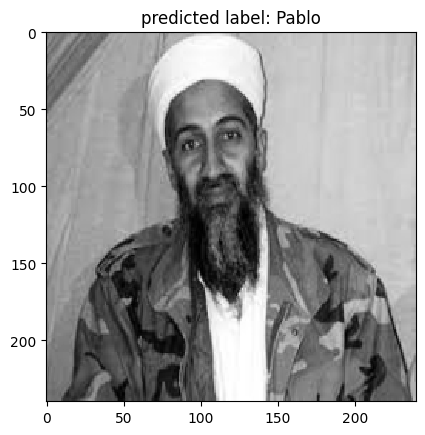

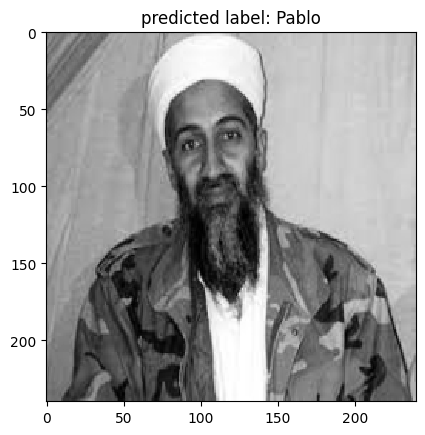

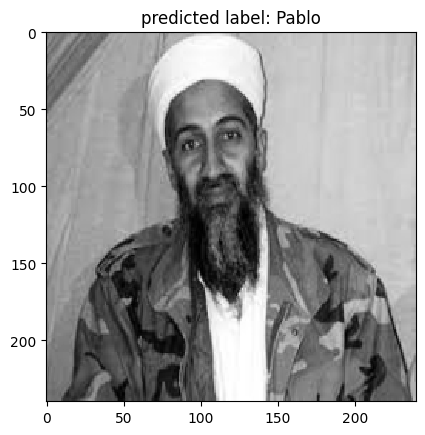

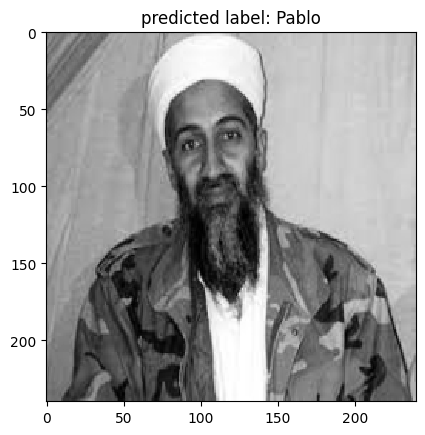

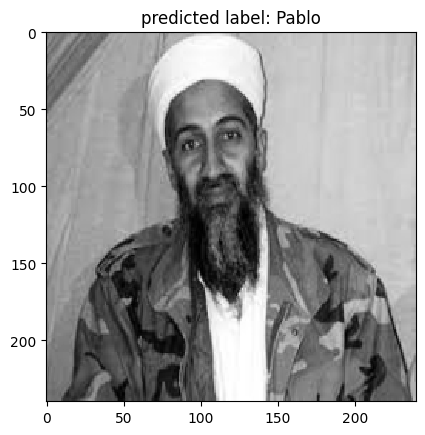

In [ ]:
for i in (np.random.randint(3,4,5)):
  predicted_images = (np.reshape(x_test[i], (240,240)).astype(np.float64))
  plt.title('predicted label: {0}'. format(y_pred[i]))
  plt.imshow(predicted_images, interpolation='nearest', cmap='gray')
  plt.show()